# 세번째 신경망 네트워크 : XOR

In [1]:
import sys, os
sys.path.append(os.pardir)      # 부모 디렉토리의 파일을 가져옴

import numpy as np
import tensorflow as tf
from libs.nn_libs import sigmoid

#### 데이터 설정

In [2]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
print(W, b)

tf.Tensor([-0.30659682  0.44631836], shape=(2,), dtype=float32) tf.Tensor([-0.9390351], shape=(1,), dtype=float32)


#### 학습 
* 중간 계산 값이 0에 가까워짐 
* 이후에 시그모이드 함수를 사용하면 0.5에 값이 가까워짐

In [7]:
learning_rate = 0.1

for i in range(2001):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j] * W) + b * 1)
        error = y[j][0] - output
        W = W + x[j] * learning_rate * error
        b = b + 1 * learning_rate * error
        error_sum += error
        
    if i %  200 == 0:
        print('step : {0:5}, error : {1:10.8f}'.format(i, error_sum))  # 자릿수 맞춰 출력하기

step :     0, error : -1.22303659
step :   200, error : -0.00455160
step :   400, error : -0.00018506
step :   600, error : -0.00000752
step :   800, error : -0.00000030
step :  1000, error : 0.00000001
step :  1200, error : 0.00000000
step :  1400, error : 0.00000000
step :  1600, error : 0.00000000
step :  1800, error : 0.00000000
step :  2000, error : 0.00000000


In [8]:
for i in range(4):
    print('X :', x[i], 'Y :', y[i], 'Output :', sigmoid(np.sum(x[i]*W) + b))

X : [1 1] Y : [0] Output : 0.5128176286712095
X : [1 0] Y : [1] Output : 0.5128176305326305
X : [0 1] Y : [1] Output : 0.4999999990686774
X : [0 0] Y : [0] Output : 0.5000000009313226


* 위의 결과가 0.5 주변에 나타는 이유는 다음과 같다. 
* 가중치 W의 첫번째 값은 약 0.0512이고 두번째 값은 0.00000000372 정도이기 때문에 첫번째 입력이 두번째 입력보다 큰 영향을 끼침 
* 편향 b는 두번째 입력과 마찬가지로 거의 영향을 주지 않음  

In [9]:
print(W, b)

tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32) tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


# XOR 문제 해결하기 
* 세개의 퍼셉트론과  뉴런 사용

In [31]:
import numpy as np
import tensorflow as tf
tf.keras.backend.clear_session()

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

#### 모델 설정 
* Sequential : 순차적으로 뉴런과 누런이 합쳐진 단위인 레이어를 일직선으로 배치
* Dense : model에서 사용하는 레이어를 정의하는 명령
* Dense는 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어 
* units : 레이어를 구성하는 뉴런의 수. 뉴런이 많을수록 일반적으로 레이어의 성능은 좋아지지만 계산량이 많아지고 메모리도 많이 차지함 
* activation : 활성화 함수 
* input_shape : 시퀀셜 모델의 첫번째 레이어에서만 정의하는데 입력의 차원 수를 정의함 

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### 모델 컴파일 
* compile : 모델이 실제로 동작할 수 있도록 준비하는 명령 
* optimizer(최적화 함수) : 딥러닝의 학습식을 정의하는 부분, 정의된 최적화 함수를 불러와서 사용 
* SGD(Stochastic Gradient Descent-확률적 경사 하강법) : 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트 수행한다는 의미이고, 확률적이란 의미는 전체를 한번에 계산하는 것이 아니라 활률적으로 일부 샘플을 구해서 조금씩 나눠서 계산한다는 의미
* loss(손실) : error와 비슷한 개념. 딥러닝은 손실을 줄이는 방향으로 학습을 진행함 
* mse(Mean squared Error-평균 제곱 오차) : 기대 출력에서 실제 출력을 뺀 뒤에 제곱한 값을 평균하는 것

In [33]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

#### 모델 요약 
* Params : 입력 2개와 편향 1개 X 2개의 뉴런 --> 전체 6개의 파라미터(x1w1, x1w2, x2w1, x2w2, b1, b2)
* 전체적으로는 9개의 매개변수가 변경
* Dense 레이어의 파라미터 수 : (입력측 뉴런의 수 + 1) X (출력측 뉴런의 수) --> (2 + 1) X 2 = 6 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습 
* fit : epochs에 지정한 횟수만큼 학습시킴 
* batch_size : 한번에 학습시키는 데이터의 수
* x : 입력 
* y : 기대 출력 

In [35]:
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 32ms/sample - loss: 0.2881
Epoch 2/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2807
Epoch 3/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2756
Epoch 4/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2717
Epoch 5/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2694
Epoch 6/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2677
Epoch 7/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2679
Epoch 8/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2664
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2669
Epoch 10/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2656
Epoch 11/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2649
Epoch 12/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2647
Epoch

4/4 [==============================] - 0s 2ms/sample - loss: 0.2639
Epoch 101/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2639
Epoch 102/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2628
Epoch 103/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2639
Epoch 104/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2638
Epoch 105/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2628
Epoch 106/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2638
Epoch 107/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2637
Epoch 108/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2637
Epoch 109/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2636
Epoch 110/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2635
Epoch 111/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2637
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.2557
Epoch 199/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2565
Epoch 200/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2565
Epoch 201/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2547
Epoch 202/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2550
Epoch 203/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2550
Epoch 204/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2556
Epoch 205/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2547
Epoch 206/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2554
Epoch 207/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2555
Epoch 208/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2552
Epoch 209/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2550
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.2340
Epoch 297/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2346
Epoch 298/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2347
Epoch 299/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2329
Epoch 300/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2345
Epoch 301/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2338
Epoch 302/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2321
Epoch 303/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2334
Epoch 304/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2332
Epoch 305/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2324
Epoch 306/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2327
Epoch 307/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2323
Epoch 308/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.2103
Epoch 395/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2101
Epoch 396/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2095
Epoch 397/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2093
Epoch 398/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2096
Epoch 399/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2090
Epoch 400/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2094
Epoch 401/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2092
Epoch 402/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2083
Epoch 403/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2088
Epoch 404/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2084
Epoch 405/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2073
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1967
Epoch 493/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1965
Epoch 494/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1957
Epoch 495/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1962
Epoch 496/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1963
Epoch 497/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1956
Epoch 498/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1961
Epoch 499/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1961
Epoch 500/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1961
Epoch 501/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1958
Epoch 502/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1952
Epoch 503/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1957
Epoch 504/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.1889
Epoch 591/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1887
Epoch 592/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1887
Epoch 593/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1885
Epoch 594/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1880
Epoch 595/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1879
Epoch 596/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1886
Epoch 597/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1884
Epoch 598/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1883
Epoch 599/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1883
Epoch 600/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1874
Epoch 601/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1872
Epoch 602/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.1813
Epoch 689/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1812
Epoch 690/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1811
Epoch 691/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1810
Epoch 692/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1808
Epoch 693/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1799
Epoch 694/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1799
Epoch 695/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1808
Epoch 696/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1798
Epoch 697/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1806
Epoch 698/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1805
Epoch 699/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1802
Epoch 700/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.1685
Epoch 787/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1685
Epoch 788/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1684
Epoch 789/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1682
Epoch 790/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1689
Epoch 791/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1685
Epoch 792/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1683
Epoch 793/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1672
Epoch 794/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1673
Epoch 795/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1671
Epoch 796/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1677
Epoch 797/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1674
Epoch 798/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.1387
Epoch 885/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1390
Epoch 886/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1385
Epoch 887/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1379
Epoch 888/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1374
Epoch 889/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1358
Epoch 890/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1356
Epoch 891/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1352
Epoch 892/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1358
Epoch 893/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1350
Epoch 894/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1338
Epoch 895/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1339
Epoch 896/2000
4/4 

4/4 [==============================] - 0s 1ms/sample - loss: 0.0815
Epoch 983/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0806
Epoch 984/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0804
Epoch 985/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0793
Epoch 986/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0791
Epoch 987/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0786
Epoch 988/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0780
Epoch 989/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0773
Epoch 990/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0765
Epoch 991/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0766
Epoch 992/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0755
Epoch 993/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0750
Epoch 994/2000
4/4 

Epoch 1080/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0431
Epoch 1081/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0427
Epoch 1082/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0424
Epoch 1083/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0423
Epoch 1084/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0419
Epoch 1085/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0418
Epoch 1086/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0415
Epoch 1087/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0414
Epoch 1088/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0410
Epoch 1089/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0407
Epoch 1090/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0407
Epoch 1091/2000
4/4 [==============================] - 0s 1ms/sample - loss:

4/4 [==============================] - 0s 1ms/sample - loss: 0.0265
Epoch 1178/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0264
Epoch 1179/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0262
Epoch 1180/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0261
Epoch 1181/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0261
Epoch 1182/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0259
Epoch 1183/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0258
Epoch 1184/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0257
Epoch 1185/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0256
Epoch 1186/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0255
Epoch 1187/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0254
Epoch 1188/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0253
Epoch 11

4/4 [==============================] - 0s 1ms/sample - loss: 0.0184
Epoch 1275/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0184
Epoch 1276/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0183
Epoch 1277/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0182
Epoch 1278/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0182
Epoch 1279/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0181
Epoch 1280/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0181
Epoch 1281/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0180
Epoch 1282/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0179
Epoch 1283/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0179
Epoch 1284/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0178
Epoch 1285/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0178
Epoch 12

4/4 [==============================] - 0s 1ms/sample - loss: 0.0138
Epoch 1372/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0138
Epoch 1373/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0138
Epoch 1374/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0137
Epoch 1375/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0137
Epoch 1376/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0137
Epoch 1377/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0136
Epoch 1378/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0136
Epoch 1379/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0136
Epoch 1380/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0135
Epoch 1381/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0135
Epoch 1382/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0135
Epoch 13

4/4 [==============================] - 0s 2ms/sample - loss: 0.0110
Epoch 1469/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0110
Epoch 1470/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0109
Epoch 1471/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0109
Epoch 1472/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0109
Epoch 1473/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0109
Epoch 1474/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1475/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1476/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1477/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1478/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0107
Epoch 1479/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0107
Epoch 14

4/4 [==============================] - 0s 2ms/sample - loss: 0.0090
Epoch 1566/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0090
Epoch 1567/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0090
Epoch 1568/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0090
Epoch 1569/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0090
Epoch 1570/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0090
Epoch 1571/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0089
Epoch 1572/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 1573/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 1574/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 1575/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 1576/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0089
Epoch 15

4/4 [==============================] - 0s 1ms/sample - loss: 0.0077
Epoch 1663/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0076
Epoch 1664/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 1665/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0076
Epoch 1666/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0076
Epoch 1667/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0076
Epoch 1668/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 1669/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 1670/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0076
Epoch 1671/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0075
Epoch 1672/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0075
Epoch 1673/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0075
Epoch 16

4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1760/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1761/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1762/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1763/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1764/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0066
Epoch 1765/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1766/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0066
Epoch 1767/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0065
Epoch 1768/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0065
Epoch 1769/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0065
Epoch 1770/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0065
Epoch 17

4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1857/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0058
Epoch 1858/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1859/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1860/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0058
Epoch 1861/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1862/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1863/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1864/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0058
Epoch 1865/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0057
Epoch 1866/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0057
Epoch 1867/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0057
Epoch 18

4/4 [==============================] - 0s 1ms/sample - loss: 0.0052
Epoch 1954/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0052
Epoch 1955/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0052
Epoch 1956/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0052
Epoch 1957/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0052
Epoch 1958/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0051
Epoch 1959/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0051
Epoch 1960/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0051
Epoch 1961/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0051
Epoch 1962/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0051
Epoch 1963/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0051
Epoch 1964/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0051
Epoch 19

#### 평가 
* predict : 네트워크의 출력 결과 확인 
* 1에 가까운 값은 1을 의미하고 0에 가까운 값은 0을 의미 

In [36]:
model.predict(x)

array([[0.07836642],
       [0.93555814],
       [0.9354229 ],
       [0.07083682]], dtype=float32)

#### 가중치와 편향
* model.weights : 가중치 정보 포함 
* kernel : 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치 
* bias : 편향과 연결된 가중치 

In [37]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.197248 ,  6.6212544],
       [-4.1906996,  6.576039 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 6.2569704, -2.8607302], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[6.772235 ],
       [6.5018997]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-9.685126], dtype=float32)>


#### 네트워크 학습 현황 확인 (그래프)

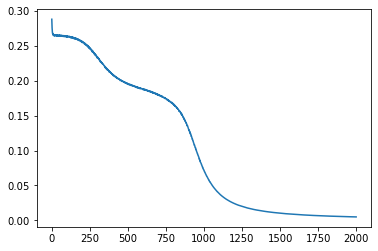

In [38]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])